#Importing library packages

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


#Loading the Raisin Dataset

In [170]:
print("Loading the Raisin Dataset:")
raisin_data = pd.read_excel("/content/Raisin_Dataset.xlsx")
raisin_data.head()


Loading the Raisin Dataset:


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


#**Data Pre-Processing**

#Display the data information

In [171]:
print("Display the data information:\n")
raisin_data.info()

Display the data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


#Checking for missing values

In [172]:
print("\nChecking for missing values:\n")
print(raisin_data.isnull().sum())


Checking for missing values:

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


#Checking for duplicate rows

In [173]:
print("\nChecking for duplicate rows:\n")
print(raisin_data.duplicated().sum())



Checking for duplicate rows:

0


#**EDA**

#Summary Statistics

In [174]:
print("\nSummary Statistics:\n")
raisin_data.describe()


Summary Statistics:



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


#**Visualizations**

#Frequency of Area

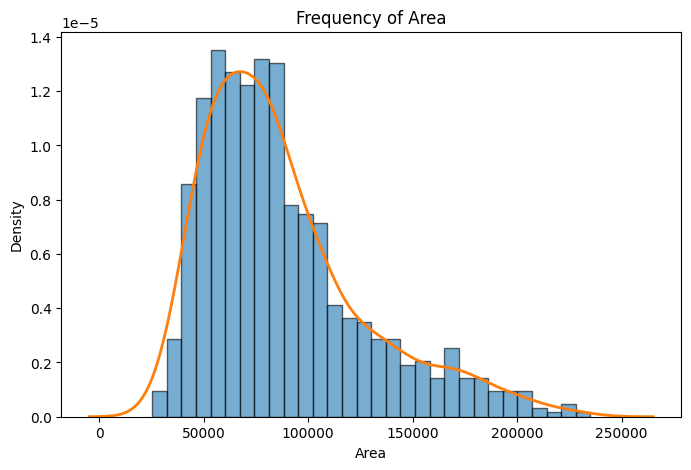

In [175]:
plt.figure(figsize=(8,5))

plt.hist(raisin_data['Area'], bins=30, edgecolor='black', alpha=0.6, density=True)

sns.kdeplot(raisin_data['Area'], linewidth=2)

plt.title("Frequency of Area")
plt.xlabel("Area")
plt.ylabel("Density")
plt.show()

#Distribution of Median Area Across Raisin Varieties

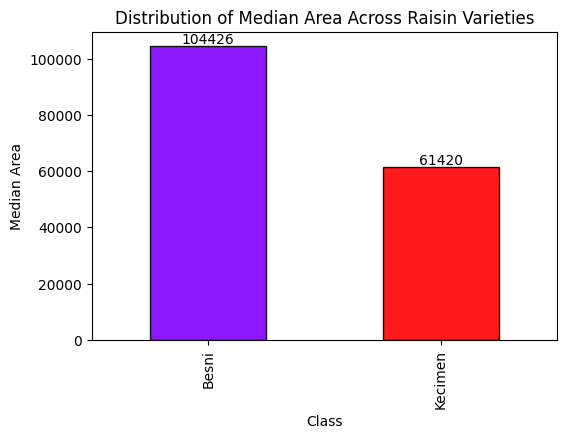

In [176]:
plt.figure(figsize=(6,4))

median_area = raisin_data.groupby('Class')['Area'].median()

colors = plt.cm.rainbow(np.linspace(0, 1, len(median_area)))

bars = median_area.plot(
    kind='bar',
    edgecolor='black',
    alpha=0.9,
    color=colors
)

for index, value in enumerate(median_area):
    plt.text(
        index,
        value,
        f"{value:.0f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Distribution of Median Area Across Raisin Varieties")
plt.xlabel("Class")
plt.ylabel("Median Area")
plt.show()


#Class Distribution of Raisins

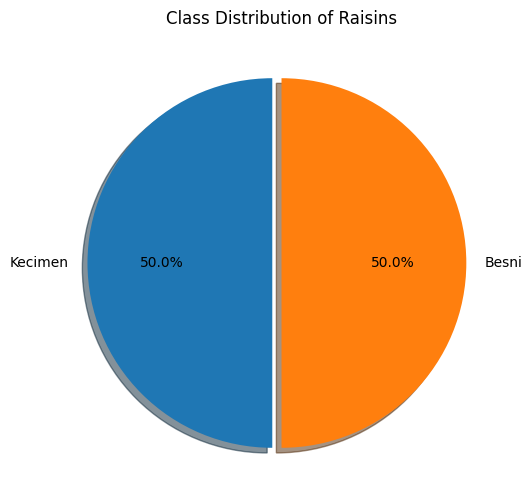

In [177]:
plt.figure(figsize=(6,6))
counts = raisin_data['Class'].value_counts()

plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    explode=[0.05, 0],
    shadow=True,
    startangle=90,
)
plt.title("Class Distribution of Raisins")
plt.show()


#Variation of Area and Perimeter Across Observations

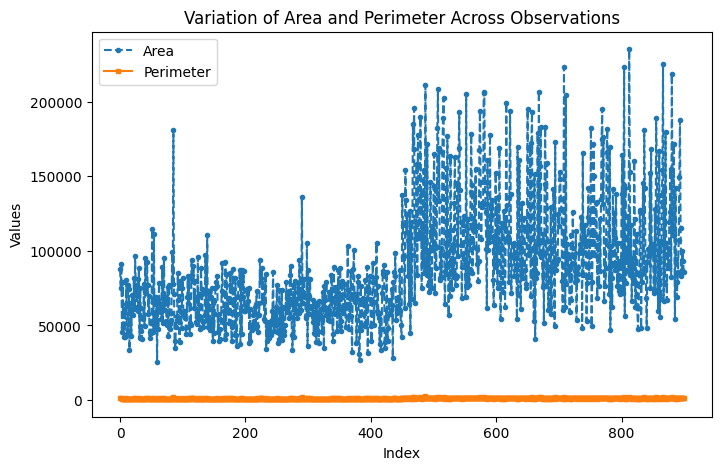

In [178]:
plt.figure(figsize=(8,5))

plt.plot(raisin_data['Area'], linestyle='--', marker='o', markersize=3, label="Area")
plt.plot(raisin_data['Perimeter'], linestyle='-', marker='s', markersize=3, label="Perimeter")

plt.title("Variation of Area and Perimeter Across Observations")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()


#Correlation Matrix

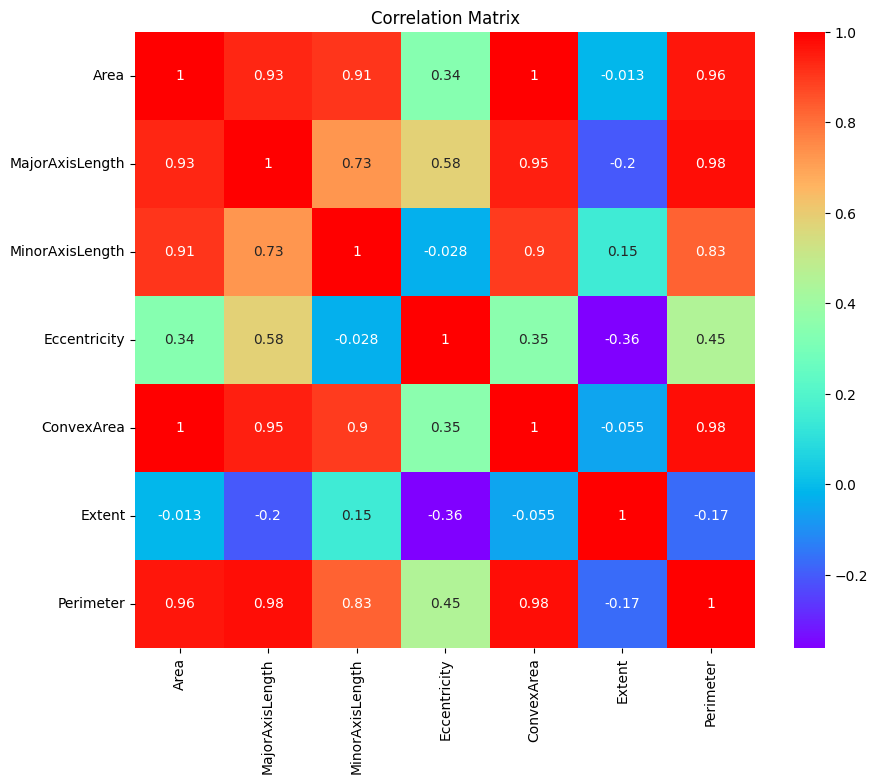

In [179]:
plt.figure(figsize=(10,8))
corr = raisin_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="rainbow")
plt.title("Correlation Matrix")
plt.show()


#**Machine Learning Model**

#Data spliting of model

In [180]:
label = LabelEncoder()
raisin_data["Class"] = label.fit_transform(raisin_data["Class"])

X = raisin_data.drop("Class", axis=1)
y = raisin_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Classification Model of Logistic Regression

In [181]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_lr = log_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nAccuracy of Logistic Regression: {:.2f}".format(accuracy_lr))

print("\nClassification Report of Logistic Regression:")
print(classification_report(y_test, y_pred_lr))



Accuracy of Logistic Regression: 0.84

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        86
           1       0.87      0.82      0.84        94

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



#Confusion Matrix of Logistic Regression

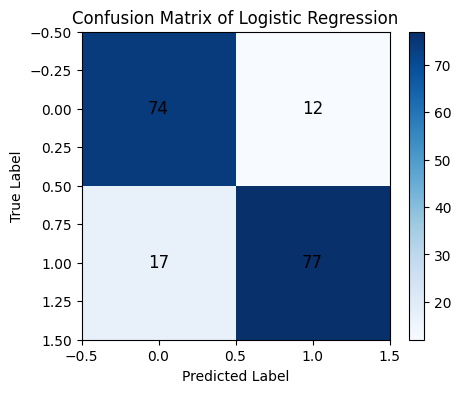

In [182]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap="Blues")
plt.title("Confusion Matrix of Logistic Regression")
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center', fontsize=12, color='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#ROC Curve Confusion Matrix of Logistic Regression

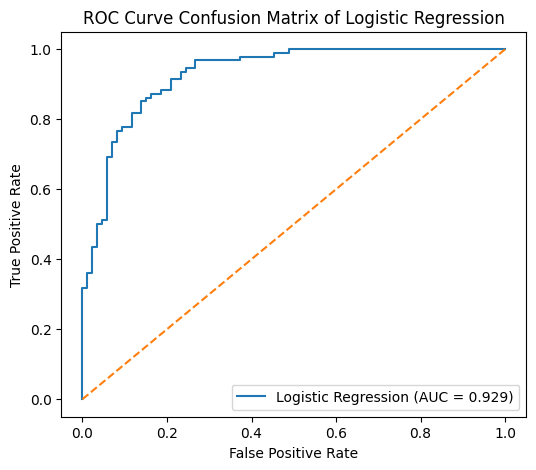

In [183]:
y_prob = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.3f})".format(roc_auc))
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve Confusion Matrix of Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#Classification Model of Decision Tree

In [184]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy of Decision Tree: {:.2f}".format(accuracy_dt))

print("\nClassification Report of Decision Tree:")
print(classification_report(y_test, y_pred_dt))



Accuracy of Decision Tree: 0.79

Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        86
           1       0.81      0.78      0.79        94

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



#Confusion Matrix of Decision Tree

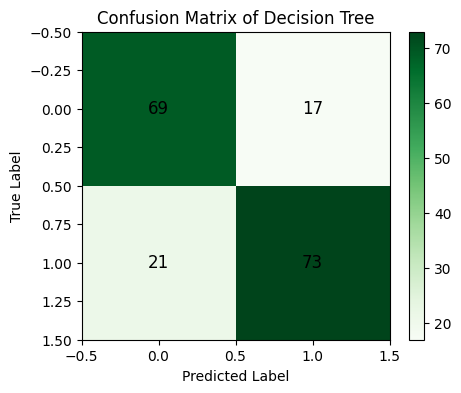

In [185]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
plt.imshow(cm_dt, interpolation='nearest', cmap="Greens")
plt.title("Confusion Matrix of Decision Tree")
plt.colorbar()

for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        plt.text(j, i, cm_dt[i, j],
                 ha='center', va='center', fontsize=12, color='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#ROC Curve of Decision Tree

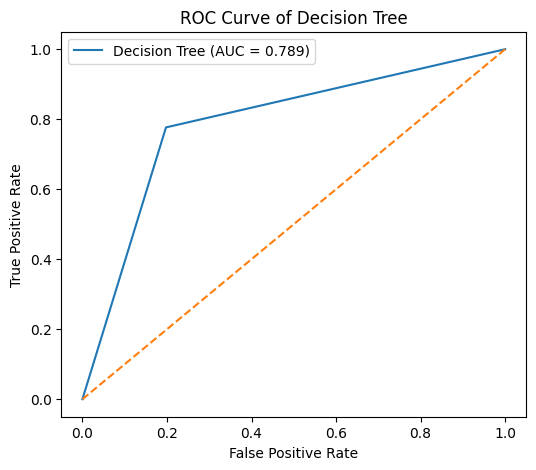

In [186]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.3f})".format(roc_auc_dt))
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve of Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#Classification Model of Support Vector Machines

In [187]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nAccuracy of Support Vector Machines: {:.2f}".format(accuracy_svm))

print("\nClassification Report of Support Vector Machines:")
print(classification_report(y_test, y_pred_svm))



Accuracy of Support Vector Machines: 0.85

Classification Report of Support Vector Machines:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        86
           1       0.83      0.90      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



#Confusion Matrix of Support Vector Machines

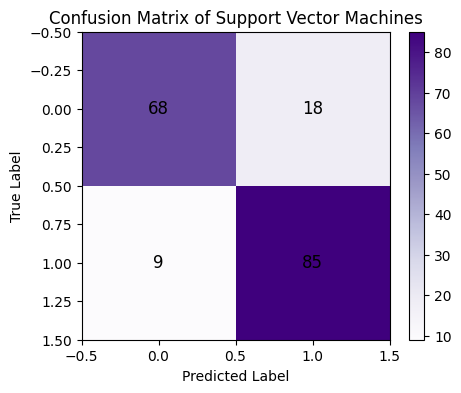

In [188]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
plt.imshow(cm_svm, interpolation='nearest', cmap="Purples")
plt.title("Confusion Matrix of Support Vector Machines")
plt.colorbar()

for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        plt.text(j, i, cm_svm[i, j],
                 ha='center', va='center', fontsize=12, color='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#ROC Curve of Support Vector Machines

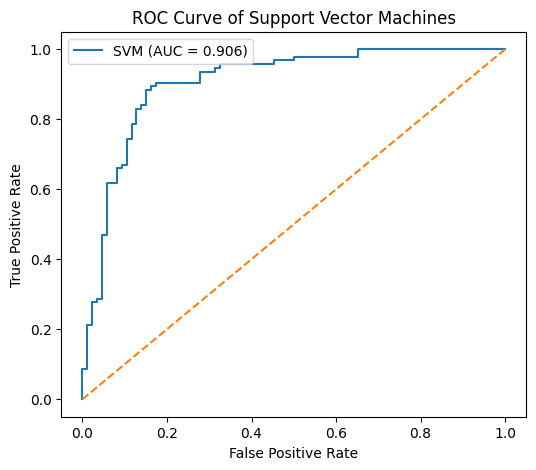

In [189]:
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="SVM (AUC = {:.3f})".format(roc_auc_svm))
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve of Support Vector Machines")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#Comparison of Models Accuracies

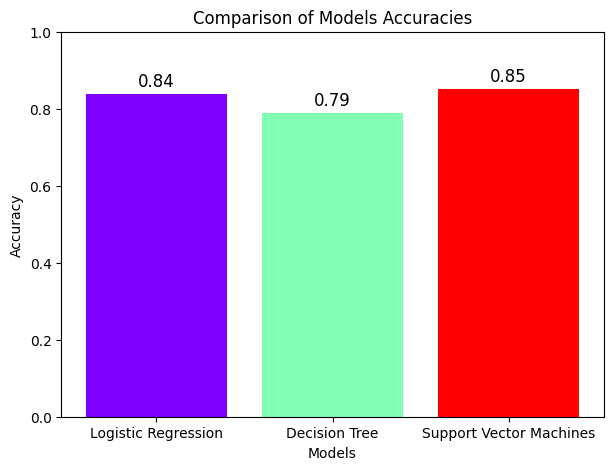

In [190]:
models = ['Logistic Regression', 'Decision Tree', 'Support Vector Machines']
accuracies = [accuracy_lr, accuracy_dt, accuracy_svm]

colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))

plt.figure(figsize=(7,5))
plt.bar(models, accuracies, color=colors)

plt.title("Comparison of Models Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.show()